In [35]:
import timeit
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from collections import Counter
from glob import glob
from unicodedata import normalize
import unidecode
from termcolor import colored
import joblib
from nltk import ngrams
from tqdm.notebook import tqdm

In [9]:
df_main = pd.read_csv('../data/signal_motifs_chapitres.csv')
df_main.drop(['Unnamed: 0'], axis=1, inplace=True)
df_main = df_main.T

In [12]:
def calculate_mean_scores(input_df):
    # Calculate the mean along columns (axis=1) and handle NaN values
    mean_scores = input_df.mean(axis=1, skipna=True)

    # Create a new DataFrame with 'index' and 'mean_score' columns
    output_df = pd.DataFrame({'index': input_df.index, 'mean_score': mean_scores})

    return output_df

In [13]:
df_mean = calculate_mean_scores(df_main)

In [15]:
def get_df_with_dates(df):
    df_res = df.copy()
    list_date = []
    for elem in df_res.index:
        list_date.append(int(elem.split('_')[0]))
    df_res['date'] = list_date

    return df_res

In [16]:
df_dates = get_df_with_dates(df_mean)

In [18]:
df_dates.head(1)

,index,mean_score,date
1954_San-Antonio_Messieurs-les-hommes,1954_San-Antonio_Messieurs-les-hommes,0.032932,1954


## TRAIN/TEST SET

In [43]:
df_train = pd.read_csv(r'../outputs/BEST_MOTIFS_CONFUSION_MATRIX.csv')
df_train.set_index(['index'], inplace=True)

In [44]:
def filter_main_dataframe(main_df, other_df):
    # Use the intersection of indices between the two DataFrames
    common_indices = main_df.index.intersection(other_df.index)
    
    # Filter the main DataFrame based on common indices
    filtered_df = main_df.loc[common_indices]
    
    return filtered_df

In [45]:
df_filtered = filter_main_dataframe(df_dates, df_train)

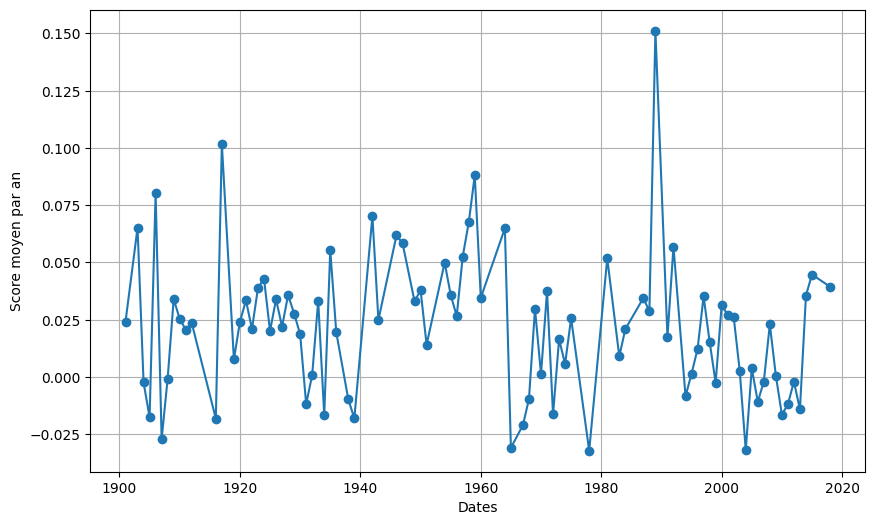

In [48]:
grouped_df = df_filtered.groupby('date')['mean_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['date'], grouped_df['mean_score'], marker='o')
plt.xlabel('Dates')
plt.ylabel('Score moyen par an')
plt.grid(True)

plt.savefig('../img/Signal_TRAIN-SET.png', format='png', bbox_inches='tight', dpi=400)

plt.show()

## TOUT CHAPITRES

In [49]:
grouped_df = df_dates.groupby('date')['mean_score'].mean().reset_index()

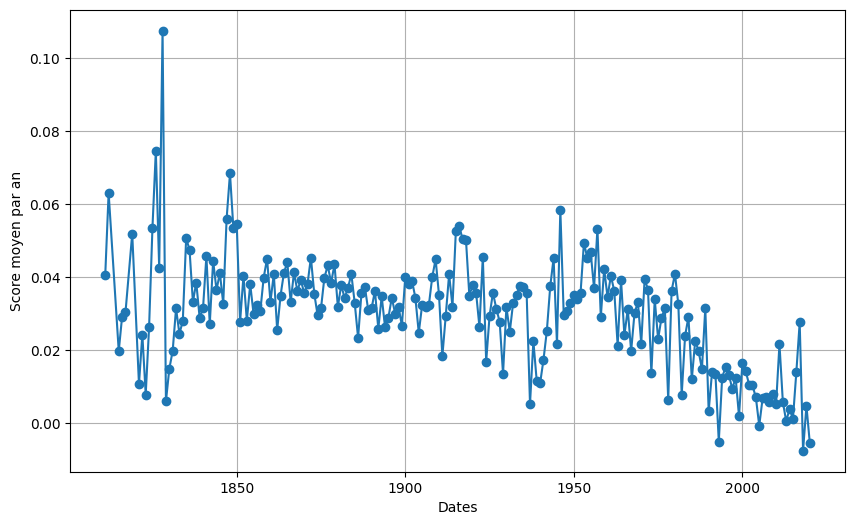

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['date'], grouped_df['mean_score'], marker='o')
plt.xlabel('Dates')
plt.ylabel('Score moyen par an')
plt.grid(True)

plt.savefig('../img/Signal_Chapitres.png', format='png', bbox_inches='tight', dpi=400)

plt.show()